### Adding libraries


In [ ]:
# Numerical Libraries
import numpy as np
import pandas as pd
import scipy
# Standard
import datetime, time, math, random
from itertools import permutations, combinations
from datetime import datetime, timedelta, date
import pandas_datareader.data as web
from matplotlib.dates import DateFormatter
# Data Import Libraries
import yfinance as yf
import pandas_datareader as pdr
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
# Plots
import seaborn as sns
import networkx as nx
from pylab import plt, mpl
from pandas.plotting import scatter_matrix



In [ ]:
# Function to get closing  from Yahoo. Input tickers as in Yahoo URL and Start/End Date YYYY-MM-DD
def GetData(T, Start, End):
    '''
    T: List of Stock indices, as in Yahoo URL for Download e.g ^GSPC for S&P 500
    Start: Date in YYYY-MM-DD
    End: Date in YYYY-MM-DD
    '''
    Close_ser = []
    t1 = int(pd.to_datetime(Start).timestamp())
    t2 = int(pd.to_datetime(End).timestamp())
    for i in T:
        URL = 'https://query1.finance.yahoo.com/v7/finance/download/'+i + '?period1=' + str(int(t1)) + '&period2='+ str(int(t2)) + '&interval=1d&events=history&includeAdjustedClose=true'
        Fin_DF = pd.read_csv(URL, header = 0, encoding = 'utf-8')
        Fin_DT = pd.to_datetime(Fin_DF['Date'])
        Fin_DF.insert(1,'DateTime', Fin_DT, allow_duplicates = False)
        Fin_DF = Fin_DF.drop(['Date'], axis=1).set_index('DateTime')
        Close_ser.append(Fin_DF)
    return Close_ser

In [ ]:
def GetAdjCloseQuotes(T, Start, End):
    '''
    T: List of Stock indices, as in Yahoo URL for Download e.g ^GSPC for S&P 500
    Start: Date in YYYY-MM-DD
    End: Date in YYYY-MM-DD
    '''
    P = GetData(T, Start, End)
    Indices_DF = []
    for i in range(len(P)):
        Indices_DF.append(pd.DataFrame(P[i]['Adj Close'].values, index = P[i].index, columns = [T[i]]))
    return Indices_DF[0].join(Indices_DF[1:], how = 'inner')



# Using code from FRED API: Get US Economic Data using Python
def get_fred_data(param_list, start_date, end_date):
    df = pdr.DataReader(param_list, "fred", start_date, end_date)
    return df.reset_index()

In [ ]:
Tickers = [ '^FTSE', '^GSPC', '^HSI','^NSEI','GLD','GOLD.AX',]
Start_Date = "2009-01-01"
End_Date = "2023-05-01"

In [ ]:
multiData = GetAdjCloseQuotes(Tickers, Start_Date, End_Date)
multiData.head()

,^FTSE,^GSPC,^HSI,^NSEI,GLD,GOLD.AX
DateTime,,,,,,
2009-01-02,4561.799805,931.799988,15042.809570,3046.750000,86.230003,124.330002
2009-01-05,4579.600098,927.450012,15563.309570,3121.449951,84.480003,120.639999
2009-01-06,4638.899902,934.700012,15509.509766,3112.800049,85.129997,118.199997
2009-01-07,4507.500000,906.650024,14987.459961,2920.399902,82.750000,117.660004
2009-01-09,4448.500000,890.349976,14377.440430,2873.000000,83.919998,119.599998


In [ ]:
# Calculating daily returns
return_multiData = multiData.pct_change().dropna()
return_multiData

,^FTSE,^GSPC,^HSI,^NSEI,GLD,GOLD.AX
DateTime,,,,,,
2009-01-05,0.003902,-0.004668,0.034601,0.024518,-0.020295,-0.029679
2009-01-06,0.012949,0.007817,-0.003457,-0.002771,0.007694,-0.020225
2009-01-07,-0.028326,-0.030010,-0.033660,-0.061809,-0.027957,-0.004568
2009-01-09,-0.013089,-0.017978,-0.040702,-0.016231,0.014139,0.016488
2009-01-12,-0.005013,-0.022564,-0.028269,-0.034772,-0.037655,0.011957
...,...,...,...,...,...,...
2023-04-21,0.001455,0.000903,-0.015749,-0.000023,-0.009888,0.002906
2023-04-24,-0.000240,0.000852,-0.005768,0.006772,0.003039,-0.004346
2023-04-26,-0.007533,-0.019591,-0.010154,0.003956,-0.000379,0.018188


In [ ]:
# Daily Volatility
TRADING_DAYS = 252
ann_vol_portfolio = return_multiData.rolling(window=TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)
ann_vol_portfolio = ann_vol_portfolio.dropna()
ann_vol_portfolio


,^FTSE,^GSPC,^HSI,^NSEI,GLD,GOLD.AX
DateTime,,,,,,
2010-02-10,0.232625,0.277415,0.335965,0.348596,0.215220,0.232228
2010-02-11,0.232659,0.277507,0.334748,0.348095,0.214936,0.230634
2010-02-17,0.233344,0.278052,0.334885,0.348433,0.215652,0.230759
2010-02-18,0.231682,0.276385,0.333109,0.342569,0.213742,0.230807
2010-02-19,0.231327,0.275734,0.331550,0.342246,0.213427,0.230304
...,...,...,...,...,...,...
2023-04-21,0.157613,0.239056,0.334156,0.158654,0.164726,0.146386
2023-04-24,0.155443,0.239003,0.334152,0.158639,0.164649,0.146072
2023-04-26,0.151591,0.239670,0.333376,0.157898,0.163885,0.147139


In [ ]:
# Sharpe_ratio
sharpe_ratio = return_multiData.mean()/ann_vol_portfolio
sharpe_ratio.tail()

,^FTSE,^GSPC,^HSI,^NSEI,GLD,GOLD.AX
DateTime,,,,,,
2023-04-21,0.001478,0.002264,0.000561,0.003981,0.001780,0.000194
2023-04-24,0.001499,0.002264,0.000561,0.003982,0.001780,0.000194
2023-04-26,0.001537,0.002258,0.000563,0.004000,0.001789,0.000193
2023-04-27,0.001537,0.002267,0.000567,0.004045,0.001796,0.000194
2023-04-28,0.001536,0.002267,0.000567,0.004047,0.001822,0.000195


In [ ]:
# Cumulative Returns
cumprod_daily_return = (1 + return_multiData).cumprod()
cumprod_daily_return.head()

,^FTSE,^GSPC,^HSI,^NSEI,GLD,GOLD.AX
DateTime,,,,,,
2009-01-05,1.003902,0.995332,1.034601,1.024518,0.979705,0.970321
2009-01-06,1.016901,1.003112,1.031025,1.021679,0.987243,0.950696
2009-01-07,0.988097,0.973009,0.996321,0.958530,0.959643,0.946352
2009-01-09,0.975163,0.955516,0.955768,0.942972,0.973211,0.961956
2009-01-12,0.970275,0.933956,0.928749,0.910183,0.936565,0.973458


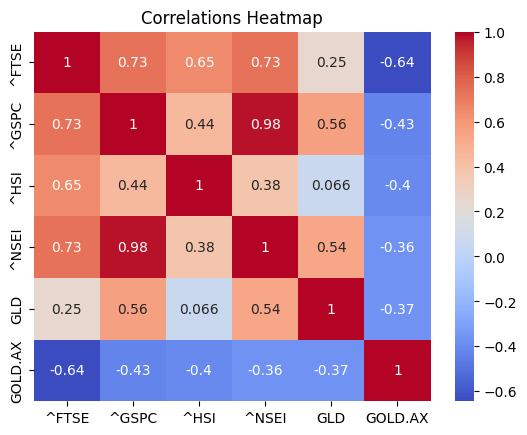

In [ ]:
#heatmap1
sns.heatmap(multiData.corr(), cmap = 'coolwarm', annot = True)
plt.title('Correlations Heatmap')
plt.show()

Text(0.5, 1.0, 'Indices sharpe_ratio')

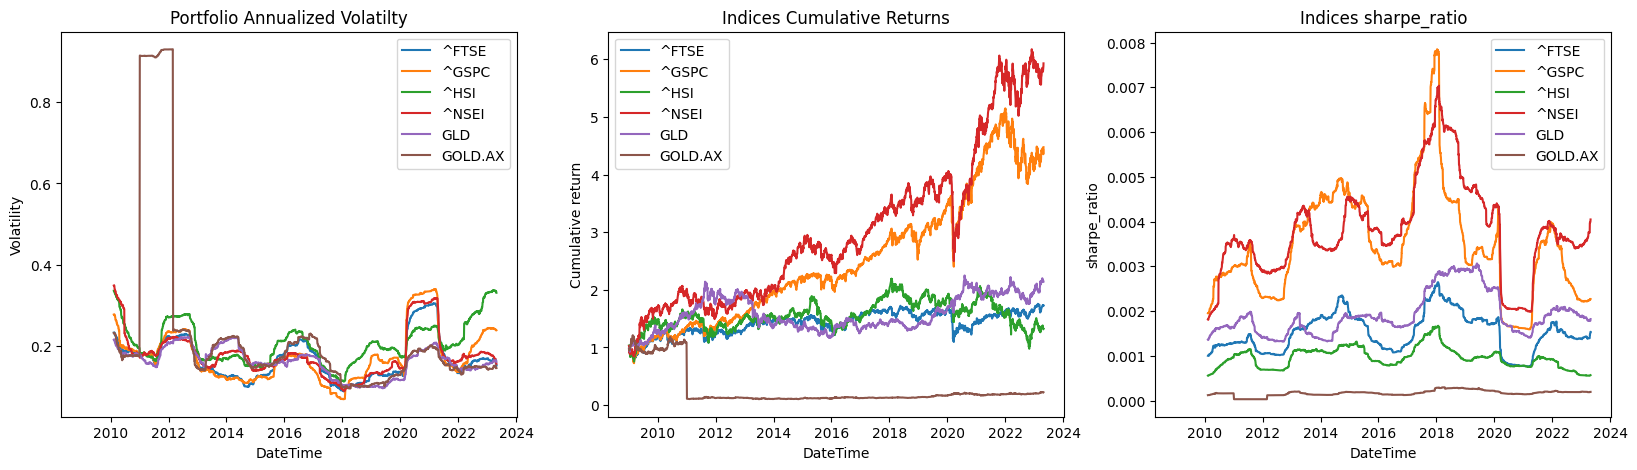

In [ ]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(20,5))

sns.lineplot(data=ann_vol_portfolio, dashes=False, ax=axes[0])
axes[0].set_ylabel('Volatility')
axes[0].set_title('Portfolio Annualized Volatilty')


sns.lineplot(data=cumprod_daily_return, dashes=False, ax=axes[1])
axes[1].set_ylabel('Cumulative return')
axes[1].set_title('Indices Cumulative Returns')

sns.lineplot(data=sharpe_ratio, dashes=False, ax=axes[2])
axes[2].set_ylabel('sharpe_ratio')
axes[2].set_title('Indices sharpe_ratio')



#### Testing volatility Scenarios

In [ ]:
ann_vol_portfolio= (ann_vol_portfolio * 100).round()
ann_vol_portfolio.head()

,^FTSE,^GSPC,^HSI,^NSEI,GLD,GOLD.AX
DateTime,,,,,,
2010-02-10,23.0,28.0,34.0,35.0,22.0,23.0
2010-02-11,23.0,28.0,33.0,35.0,21.0,23.0
2010-02-17,23.0,28.0,33.0,35.0,22.0,23.0
2010-02-18,23.0,28.0,33.0,34.0,21.0,23.0
2010-02-19,23.0,28.0,33.0,34.0,21.0,23.0


In [ ]:
vol_bins = [0, 10, 20, 30, 40, 50, 60]
vol_labels = ['0-9','10-19','20-29','30-39','40-49','50-59']
ann_vol_portfolio_2=pd.DataFrame()
ann_vol_portfolio_2['ftse_group'] = pd.cut(ann_vol_portfolio['^FTSE'], bins=vol_bins, labels=vol_labels, right=False)
ann_vol_portfolio_2['gspc_group'] = pd.cut(ann_vol_portfolio['^GSPC'], bins=vol_bins, labels=vol_labels, right=False)
ann_vol_portfolio_2['hsi_group'] = pd.cut(ann_vol_portfolio['^HSI'], bins=vol_bins, labels=vol_labels, right=False)
ann_vol_portfolio_2['nsei_group'] = pd.cut(ann_vol_portfolio['^NSEI'], bins=vol_bins, labels=vol_labels, right=False)
ann_vol_portfolio_2['gld_group'] = pd.cut(ann_vol_portfolio['GLD'], bins=vol_bins, labels=vol_labels, right=False)
ann_vol_portfolio_2['gold.ax_group'] = pd.cut(ann_vol_portfolio['GOLD.AX'], bins=vol_bins, labels=vol_labels, right=False)
ann_vol_portfolio_2.tail()

,ftse_group,gspc_group,hsi_group,nsei_group,gld_group,gold.ax_group
DateTime,,,,,,
2023-04-21,10-19,20-29,30-39,10-19,10-19,10-19
2023-04-24,10-19,20-29,30-39,10-19,10-19,10-19
2023-04-26,10-19,20-29,30-39,10-19,10-19,10-19
2023-04-27,10-19,20-29,30-39,10-19,10-19,10-19
2023-04-28,10-19,20-29,30-39,10-19,10-19,10-19


<Axes: ylabel='Frequency'>

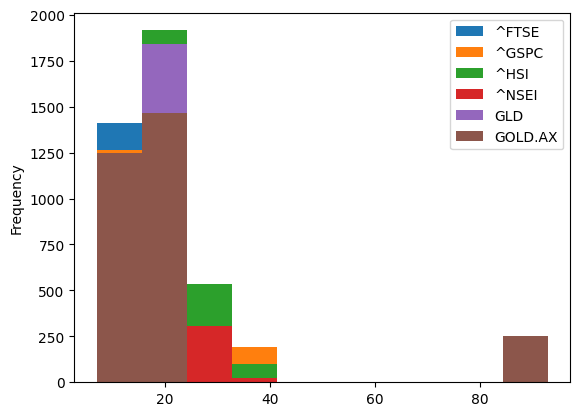

In [ ]:
# Histogram
ann_vol_portfolio.plot.hist(bins=10)

In [ ]:
# Count
count_df_1 = ((ann_vol_portfolio < 30) & (ann_vol_portfolio.diff() < 40)).sum()
count_df_2 = ((ann_vol_portfolio > 15) & (ann_vol_portfolio.diff() < 20)).sum()
count_df_3 = ((ann_vol_portfolio > 10) & (ann_vol_portfolio.diff() < 30)).sum()
count_df_4 = ((ann_vol_portfolio > 20) & (ann_vol_portfolio.diff() < 10)).sum()
count_df_5 = ((ann_vol_portfolio > 25) & (ann_vol_portfolio.diff() < 10)).sum()

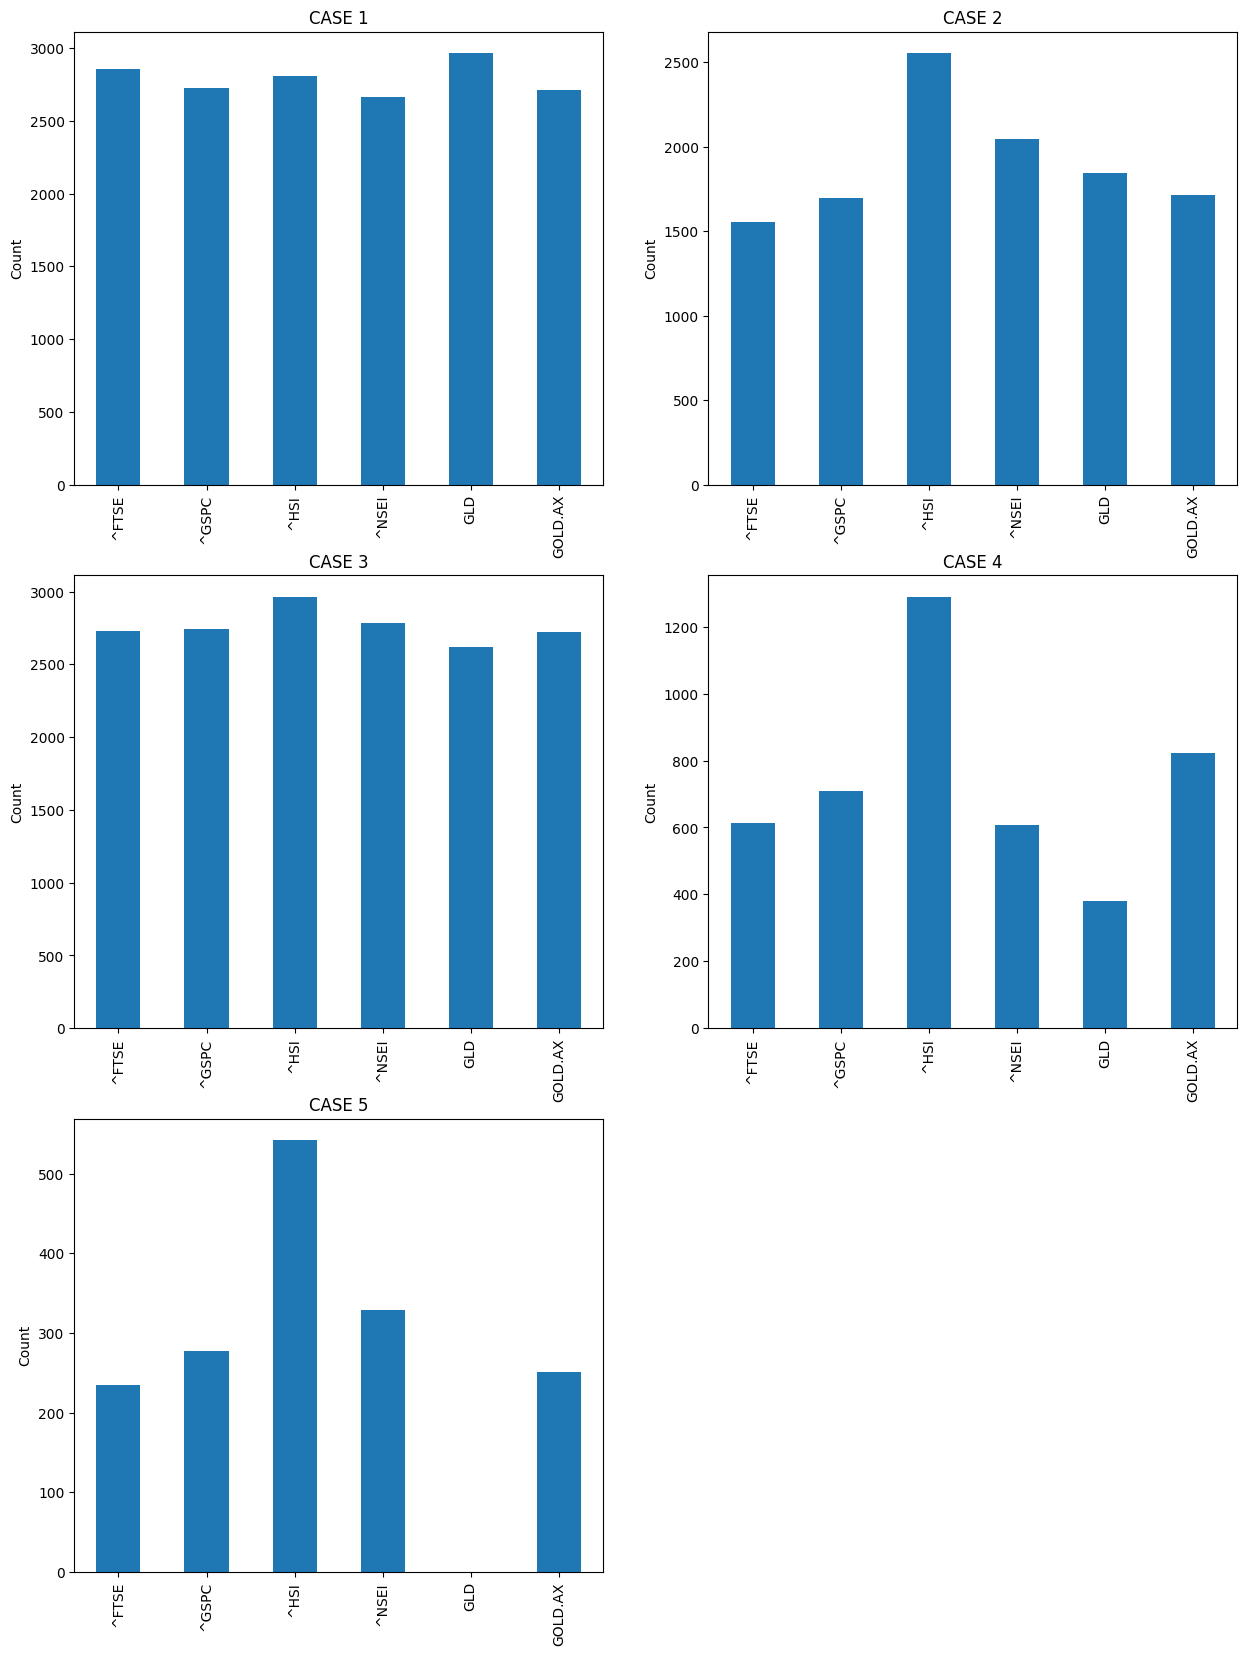

In [ ]:
plt.figure(figsize=(15, 20))
plt.subplot(3,2,1)
count_df_1.plot.bar()
plt.ylabel('Count')
plt.title('CASE 1')

plt.subplot(3,2,2)
count_df_2.plot.bar()
plt.ylabel('Count')
plt.title('CASE 2')

plt.subplot(3,2,3)
count_df_3.plot.bar()
plt.ylabel('Count')
plt.title('CASE 3')

plt.subplot(3,2,4)
count_df_4.plot.bar()
plt.ylabel('Count')
plt.title('CASE 4')

plt.subplot(3,2,5)
count_df_5.plot.bar()
plt.ylabel('Count')
plt.title('CASE 5')

plt.show()

In [ ]:
ann_vol_portfolio=ann_vol_portfolio.reset_index()
return_multiData=return_multiData.reset_index()

###  For ^FTSE

In [ ]:
filtered_dates = ann_vol_portfolio[(ann_vol_portfolio['^FTSE'] > 20) & (ann_vol_portfolio['^FTSE'].diff() < 10)]['DateTime']

selected_returns = []
for date in filtered_dates:
    return_value = return_multiData.loc[return_multiData['DateTime'] == date, '^FTSE'].values
    if len(return_value) > 0:
        selected_returns.append((date, return_value[0]))



In [ ]:
selected_returns=pd.DataFrame(selected_returns)
selected_returns.set_axis(['Date', 'Portfolio_Return'], axis=1, inplace=True)
selected_returns.head()

,Date,Portfolio_Return
0,2010-02-11,0.005748
1,2010-02-17,0.022300
2,2010-02-18,0.009192
3,2010-02-19,0.006216
4,2010-02-22,-0.001138


<Axes: ylabel='Frequency'>

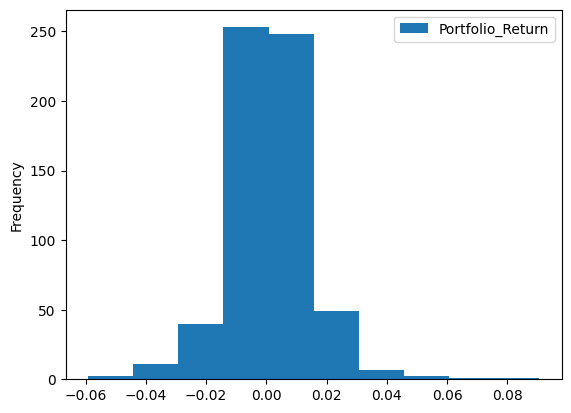

In [ ]:
# Histogram
selected_returns.plot.hist()

Text(0, 0.5, 'Return')

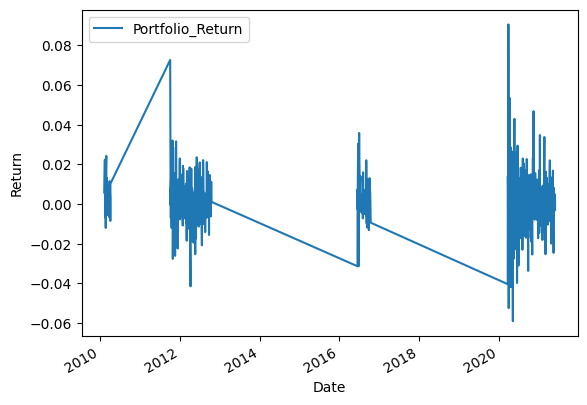

In [ ]:
selected_returns=selected_returns.set_index('Date')
selected_returns.plot()
plt.ylabel('Return')

# BOND DATA

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving United Kingdom 10-Year Bond Yield Historical Data.csv to United Kingdom 10-Year Bond Yield Historical Data.csv
Saving India 10-Year Bond Yield Historical Data.csv to India 10-Year Bond Yield Historical Data.csv
Saving China 10-Year Bond Yield Historical Data.csv to China 10-Year Bond Yield Historical Data.csv
Saving United States 10-Year Bond Yield Historical Data.csv to United States 10-Year Bond Yield Historical Data.csv


In [ ]:
df_data_us=pd.read_csv('United States 10-Year Bond Yield Historical Data.csv')
df_data_ind=pd.read_csv('India 10-Year Bond Yield Historical Data.csv')
df_data_chi=pd.read_csv('China 10-Year Bond Yield Historical Data.csv')
df_data_uk=pd.read_csv('United Kingdom 10-Year Bond Yield Historical Data.csv')


In [ ]:
df_data_us=df_data_us.set_index('Date')
df_data_uk=df_data_uk.set_index('Date')
df_data_ind=df_data_ind.set_index('Date')
df_data_chi=df_data_chi.set_index('Date')


In [ ]:
df_bond=pd.DataFrame()
df_bond['US_Price']=df_data_us['Price']
df_bond['IN_Price']=df_data_ind['Price']
df_bond['UK_Price']=df_data_uk['Price']

df_bond['CHI_Price']=df_data_chi['Price']

df_bond.head()

,US_Price,IN_Price,UK_Price,CHI_Price
Date,,,,
01/05/2023,3.722,7.327,3.552,2.870
01/04/2023,3.690,7.321,3.493,2.863
01/03/2023,3.752,7.321,3.653,2.873
01/02/2023,3.879,7.340,3.699,NaN
12/30/2022,3.879,7.327,3.669,2.884


In [ ]:
df_bond=df_bond.reset_index()
df_bond

,Date,US_Price,IN_Price,UK_Price,CHI_Price
0,01/05/2023,3.722,7.327,3.552,2.870
1,01/04/2023,3.690,7.321,3.493,2.863
2,01/03/2023,3.752,7.321,3.653,2.873
3,01/02/2023,3.879,7.340,3.699,NaN
4,12/30/2022,3.879,7.327,3.669,2.884
...,...,...,...,...,...
2617,01/08/2013,1.864,7.906,2.030,3.600
2618,01/07/2013,1.901,7.900,2.086,3.590
2619,01/04/2013,1.903,7.930,2.117,3.610
2620,01/03/2013,1.911,7.967,2.073,NaN


In [ ]:
df_bond['Date'] = pd.to_datetime(df_bond['Date'], infer_datetime_format=True)
df_bond=df_bond.set_index('Date')
df_bond


,US_Price,IN_Price,UK_Price,CHI_Price
Date,,,,
2023-01-05,3.722,7.327,3.552,2.870
2023-01-04,3.690,7.321,3.493,2.863
2023-01-03,3.752,7.321,3.653,2.873
2023-01-02,3.879,7.340,3.699,NaN
2022-12-30,3.879,7.327,3.669,2.884
...,...,...,...,...
2013-01-08,1.864,7.906,2.030,3.600
2013-01-07,1.901,7.900,2.086,3.590
2013-01-04,1.903,7.930,2.117,3.610


In [ ]:
df_bond=df_bond.dropna()
df_bond.head()

,US_Price,IN_Price,UK_Price,CHI_Price
Date,,,,
2023-01-05,3.722,7.327,3.552,2.870
2023-01-04,3.690,7.321,3.493,2.863
2023-01-03,3.752,7.321,3.653,2.873
2022-12-30,3.879,7.327,3.669,2.884
2022-12-29,3.820,7.311,3.661,2.882


In [ ]:
df_bond_return=df_bond.pct_change()
df_bond_return.fillna(0, inplace=True)
df_bond_return.head()

,US_Price,IN_Price,UK_Price,CHI_Price
Date,,,,
2023-01-05,0.000000,0.000000,0.000000,0.000000
2023-01-04,-0.008598,-0.000819,-0.016610,-0.002439
2023-01-03,0.016802,0.000000,0.045806,0.003493
2022-12-30,0.033849,0.000820,0.004380,0.003829
2022-12-29,-0.015210,-0.002184,-0.002180,-0.000693


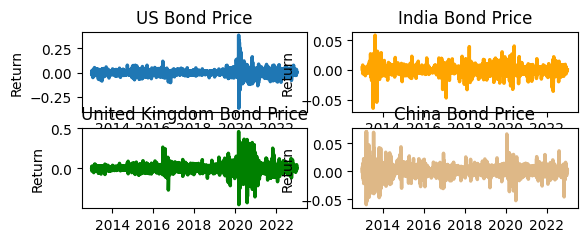

In [ ]:
ax1 = plt.subplot(4,2,1)
ax2 = plt.subplot(4,2,2)
ax3 = plt.subplot(4,2,3)
ax4 = plt.subplot(4,2,4)



ax1.plot(df_bond_return['US_Price'], linewidth = 2.5)
ax1.set_ylabel('Return')
ax1.set_title('US Bond Price')

ax2.plot(df_bond_return['IN_Price'], color = 'orange', linewidth = 2.5)
ax2.set_ylabel('Return')
ax2.set_title('India Bond Price')

ax3.plot(df_bond_return['UK_Price'], color = 'green', linewidth = 2.5)
ax3.set_ylabel('Return')
ax3.set_title('United Kingdom Bond Price')



ax4.plot(df_bond_return['CHI_Price'], color = '#DEB887', linewidth = 2.5)
ax4.set_ylabel('Return')
ax4.set_title('China Bond Price')


plt.show()

In [ ]:
F_data = multiData.join(df_bond, how='inner')
F_data.head()

,^FTSE,^GSPC,^HSI,^NSEI,GLD,GOLD.AX,US_Price,IN_Price,UK_Price,CHI_Price
2013-01-04,6089.799805,1466.469971,23331.089844,6016.149902,160.440002,15.277,1.903,7.930,2.117,3.61
2013-01-07,6064.600098,1461.890015,23329.750000,5988.399902,159.429993,15.282,1.901,7.900,2.086,3.59
2013-01-08,6053.600098,1457.150024,23111.189453,6001.700195,160.559998,15.189,1.864,7.906,2.030,3.60
2013-01-09,6098.700195,1461.020020,23218.470703,5971.500000,160.490005,15.235,1.860,7.897,2.024,3.58
2013-01-10,6101.500000,1472.119995,23354.310547,5968.649902,161.979996,15.210,1.899,7.877,2.096,3.59


In [ ]:
return_multiData=return_multiData.set_index('DateTime')

In [ ]:
Final_Data = return_multiData.join(df_bond_return, how="inner")
Final_Data.head()

,^FTSE,^GSPC,^HSI,^NSEI,GLD,GOLD.AX,US_Price,IN_Price,UK_Price,CHI_Price
2013-01-04,0.007028,0.004865,-0.002885,0.001107,-0.004715,-0.016038,0.001052,0.003797,0.014861,0.005571
2013-01-07,-0.004138,-0.003123,-0.000057,-0.004613,-0.006295,0.000327,0.019850,-0.000759,0.027586,-0.002778
2013-01-08,-0.001814,-0.003242,-0.009368,0.002221,0.007088,-0.006086,0.002151,0.001140,0.002964,0.005587
2013-01-09,0.007450,0.002656,0.004642,-0.005032,-0.000436,0.003029,-0.020537,0.002539,-0.034351,-0.002786
2013-01-10,0.000459,0.007597,0.005851,-0.000477,0.009284,-0.001641,0.017685,0.001398,0.006241,-0.002778


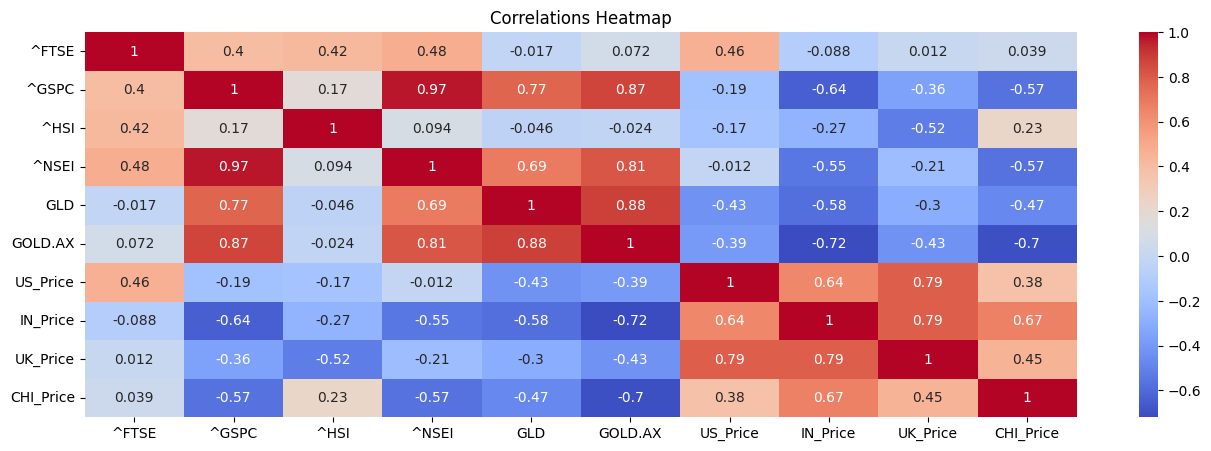

In [ ]:
#heatmap2
plt.figure(figsize = (16,5))
sns.heatmap(F_data.corr(), cmap = 'coolwarm', annot = True)
plt.title('Correlations Heatmap')
plt.show()

**Equity which are highly correlated equity with S&P 500 are  ^NSEI, GOLD, GOLD.AX and ESS**

<Axes: >

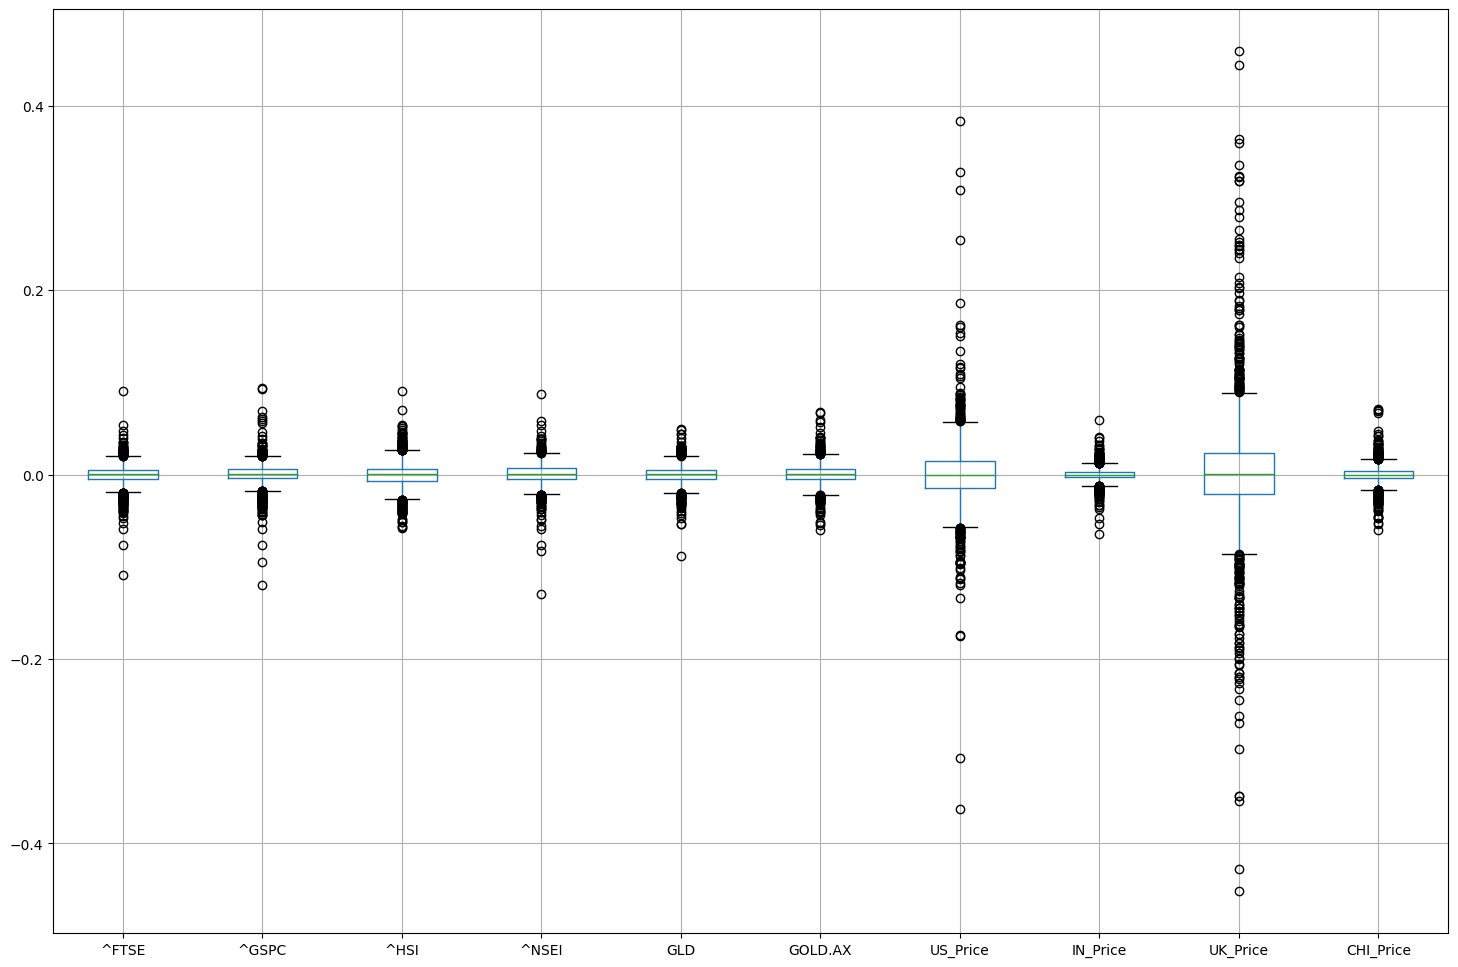

In [ ]:
# Box plot to visually show risk
Final_Data.boxplot(figsize=(18,12))

In [ ]:
#
Final_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
^FTSE,2131.0,0.000142,0.010465,-0.108738,-0.004568,0.000586,0.005363,0.090530
^GSPC,2131.0,0.000481,0.011533,-0.119841,-0.003766,0.000742,0.005697,0.093828
^HSI,2131.0,-0.000046,0.013062,-0.058408,-0.006870,0.000222,0.006489,0.090818
^NSEI,2131.0,0.000525,0.011091,-0.129805,-0.004686,0.000665,0.006565,0.087632
GLD,2131.0,0.000039,0.009930,-0.087808,-0.005010,0.000336,0.005097,0.049038
GOLD.AX,2131.0,0.000260,0.010314,-0.060243,-0.005222,0.000098,0.005750,0.068345
US_Price,2131.0,0.000132,0.033282,-0.362600,-0.014574,0.000000,0.014289,0.382826
IN_Price,2131.0,0.000135,0.007062,-0.064204,-0.002887,0.000000,0.003153,0.058873
UK_Price,2131.0,0.001532,0.061595,-0.451724,-0.020585,0.000754,0.023057,0.459119
CHI_Price,2131.0,0.000187,0.009577,-0.059639,-0.004060,0.000000,0.004258,0.070796


### Solution portfolio Analysis

Case 1: 90Equity + 10 bond

Case 2: 80Equity + 20 Bond

Case 3: 70 Equity + 30 Bond

Case 4: 60 Equity + 40 Bond

Case 5: 10 Equity + 90 Bond

Baseline : 100 Equity

In [ ]:
# Define weights
wts_c1 = [0.9, 0.1]
wts_c2 = [0.8, 0.2]
wts_c3 = [0.7, 0.3]
wts_c4 = [0.6, 0.4]
wts_c5 = [0.1, 0.9]
wts_b = [1, 0]

#Portfolio Subsets
Final_Data_US = Final_Data[['^GSPC','US_Price']]
Final_Data_UK = Final_Data[['^FTSE','UK_Price']]
Final_Data_IN = Final_Data[['^NSEI','IN_Price']]
Final_Data_CH = Final_Data[['^HSI','CHI_Price']]






## FOR UNITED STATES


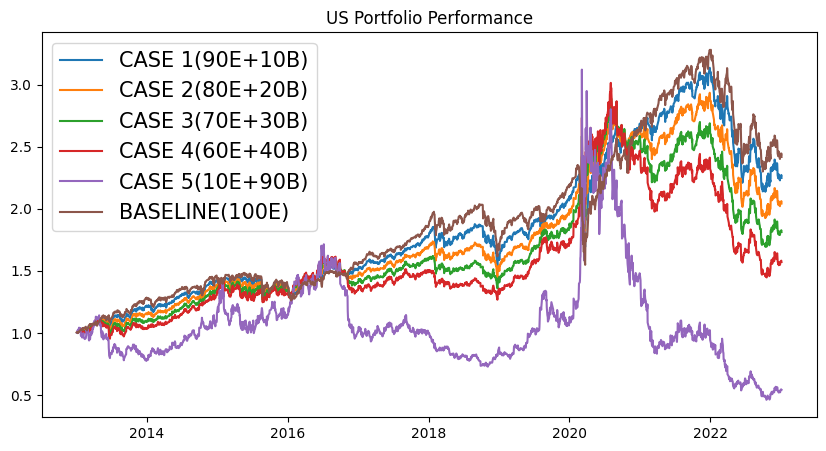

In [ ]:
# US
weighted_return_c1_us = (wts_c1 * Final_Data_US)
weighted_return_c2_us = (wts_c2 * Final_Data_US)
weighted_return_c3_us = (wts_c3 * Final_Data_US)
weighted_return_c4_us = (wts_c4 * Final_Data_US)
weighted_return_c5_us = (wts_c5 * Final_Data_US)
weighted_return_b_us = (wts_b * Final_Data_US)

#Cumulative Portfolio US
portfolio_return_c1_us = weighted_return_c1_us.sum(axis=1)
cumprod_portfolio_c1_us = (1 + portfolio_return_c1_us).cumprod()

portfolio_return_c2_us = weighted_return_c2_us.sum(axis=1)
cumprod_portfolio_c2_us = (1 + portfolio_return_c2_us).cumprod()

portfolio_return_c3_us = weighted_return_c3_us.sum(axis=1)
cumprod_portfolio_c3_us = (1 + portfolio_return_c3_us).cumprod()

portfolio_return_c4_us = weighted_return_c4_us.sum(axis=1)
cumprod_portfolio_c4_us = (1 + portfolio_return_c4_us).cumprod()

portfolio_return_c5_us = weighted_return_c5_us.sum(axis=1)
cumprod_portfolio_c5_us = (1 + portfolio_return_c5_us).cumprod()

portfolio_return_b_us = weighted_return_b_us.sum(axis=1)
cumprod_portfolio_b_us = (1 + portfolio_return_b_us).cumprod()

#Plotting the solution portfolio's returns
plt.figure(figsize=(10, 5))
plt.plot(cumprod_portfolio_c1_us, label='CASE 1(90E+10B)')
plt.plot(cumprod_portfolio_c2_us, label='CASE 2(80E+20B)')
plt.plot(cumprod_portfolio_c3_us, label='CASE 3(70E+30B)')
plt.plot(cumprod_portfolio_c4_us, label='CASE 4(60E+40B)')
plt.plot(cumprod_portfolio_c5_us, label='CASE 5(10E+90B)')
plt.plot(cumprod_portfolio_b_us, label='BASELINE(100E)')
plt.legend(loc='upper left', fontsize=15)
plt.title("US Portfolio Performance");


### United Kingdom

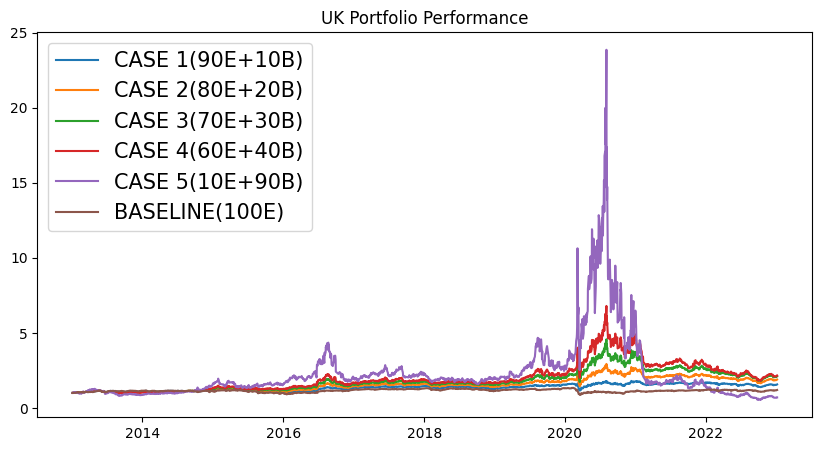

In [ ]:
# UK
weighted_return_c1_uk = (wts_c1 * Final_Data_UK)
weighted_return_c2_uk = (wts_c2 * Final_Data_UK)
weighted_return_c3_uk = (wts_c3 * Final_Data_UK)
weighted_return_c4_uk = (wts_c4 * Final_Data_UK)
weighted_return_c5_uk = (wts_c5 * Final_Data_UK)
weighted_return_b_uk = (wts_b * Final_Data_UK)

#Cumulative Portfolio UK
portfolio_return_c1_uk = weighted_return_c1_uk.sum(axis=1)
cumprod_portfolio_c1_uk = (1 + portfolio_return_c1_uk).cumprod()

portfolio_return_c2_uk = weighted_return_c2_uk.sum(axis=1)
cumprod_portfolio_c2_uk = (1 + portfolio_return_c2_uk).cumprod()

portfolio_return_c3_uk = weighted_return_c3_uk.sum(axis=1)
cumprod_portfolio_c3_uk = (1 + portfolio_return_c3_uk).cumprod()

portfolio_return_c4_uk = weighted_return_c4_uk.sum(axis=1)
cumprod_portfolio_c4_uk = (1 + portfolio_return_c4_uk).cumprod()

portfolio_return_c5_uk = weighted_return_c5_uk.sum(axis=1)
cumprod_portfolio_c5_uk = (1 + portfolio_return_c5_uk).cumprod()

portfolio_return_b_uk = weighted_return_b_uk.sum(axis=1)
cumprod_portfolio_b_uk = (1 + portfolio_return_b_uk).cumprod()

#Plotting the solution portfolio's returns
plt.figure(figsize=(10, 5))
plt.plot(cumprod_portfolio_c1_uk, label='CASE 1(90E+10B)')
plt.plot(cumprod_portfolio_c2_uk, label='CASE 2(80E+20B)')
plt.plot(cumprod_portfolio_c3_uk, label='CASE 3(70E+30B)')
plt.plot(cumprod_portfolio_c4_uk, label='CASE 4(60E+40B)')
plt.plot(cumprod_portfolio_c5_uk, label='CASE 5(10E+90B)')
plt.plot(cumprod_portfolio_b_uk, label='BASELINE(100E)')
plt.legend(loc='upper left', fontsize=15)
plt.title("UK Portfolio Performance");

### India

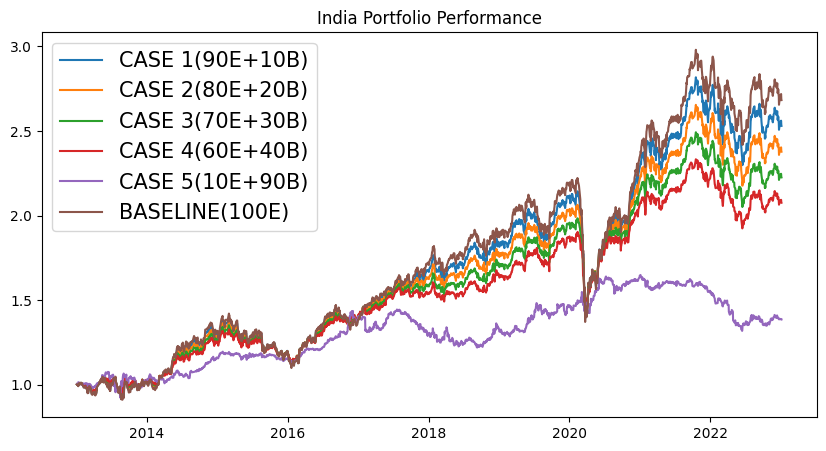

In [ ]:
# India
weighted_return_c1_in = (wts_c1 * Final_Data_IN)
weighted_return_c2_in = (wts_c2 * Final_Data_IN)
weighted_return_c3_in = (wts_c3 * Final_Data_IN)
weighted_return_c4_in = (wts_c4 * Final_Data_IN)
weighted_return_c5_in = (wts_c5 * Final_Data_IN)
weighted_return_b_in = (wts_b * Final_Data_IN)

#Cumulative Portfolio India
portfolio_return_c1_in = weighted_return_c1_in.sum(axis=1)
cumprod_portfolio_c1_in = (1 + portfolio_return_c1_in).cumprod()

portfolio_return_c2_in = weighted_return_c2_in.sum(axis=1)
cumprod_portfolio_c2_in = (1 + portfolio_return_c2_in).cumprod()

portfolio_return_c3_in = weighted_return_c3_in.sum(axis=1)
cumprod_portfolio_c3_in = (1 + portfolio_return_c3_in).cumprod()

portfolio_return_c4_in = weighted_return_c4_in.sum(axis=1)
cumprod_portfolio_c4_in = (1 + portfolio_return_c4_in).cumprod()

portfolio_return_c5_in = weighted_return_c5_in.sum(axis=1)
cumprod_portfolio_c5_in = (1 + portfolio_return_c5_in).cumprod()

portfolio_return_b_in = weighted_return_b_in.sum(axis=1)
cumprod_portfolio_b_in = (1 + portfolio_return_b_in).cumprod()

#Plotting the solution portfolio's returns
plt.figure(figsize=(10, 5))
plt.plot(cumprod_portfolio_c1_in, label='CASE 1(90E+10B)')
plt.plot(cumprod_portfolio_c2_in, label='CASE 2(80E+20B)')
plt.plot(cumprod_portfolio_c3_in, label='CASE 3(70E+30B)')
plt.plot(cumprod_portfolio_c4_in, label='CASE 4(60E+40B)')
plt.plot(cumprod_portfolio_c5_in, label='CASE 5(10E+90B)')
plt.plot(cumprod_portfolio_b_in, label='BASELINE(100E)')
plt.legend(loc='upper left', fontsize=15)
plt.title("India Portfolio Performance");

### China

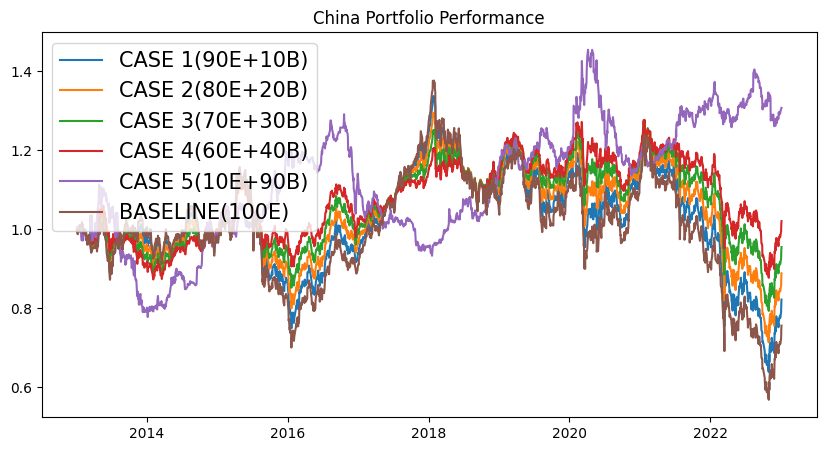

In [ ]:
# China
weighted_return_c1_ch = (wts_c1 * Final_Data_CH)
weighted_return_c2_ch = (wts_c2 * Final_Data_CH)
weighted_return_c3_ch = (wts_c3 * Final_Data_CH)
weighted_return_c4_ch = (wts_c4 * Final_Data_CH)
weighted_return_c5_ch = (wts_c5 * Final_Data_CH)
weighted_return_b_ch = (wts_b * Final_Data_CH)

#Cumulative Portfolio China
portfolio_return_c1_ch = weighted_return_c1_ch.sum(axis=1)
cumprod_portfolio_c1_ch = (1 + portfolio_return_c1_ch).cumprod()

portfolio_return_c2_ch = weighted_return_c2_ch.sum(axis=1)
cumprod_portfolio_c2_ch = (1 + portfolio_return_c2_ch).cumprod()

portfolio_return_c3_ch = weighted_return_c3_ch.sum(axis=1)
cumprod_portfolio_c3_ch = (1 + portfolio_return_c3_ch).cumprod()

portfolio_return_c4_ch = weighted_return_c4_ch.sum(axis=1)
cumprod_portfolio_c4_ch = (1 + portfolio_return_c4_ch).cumprod()

portfolio_return_c5_ch = weighted_return_c5_ch.sum(axis=1)
cumprod_portfolio_c5_ch = (1 + portfolio_return_c5_ch).cumprod()

portfolio_return_b_ch = weighted_return_b_ch.sum(axis=1)
cumprod_portfolio_b_ch = (1 + portfolio_return_b_ch).cumprod()

#Plotting the solution portfolio's returns
plt.figure(figsize=(10, 5))
plt.plot(cumprod_portfolio_c1_ch, label='CASE 1(90E+10B)')
plt.plot(cumprod_portfolio_c2_ch, label='CASE 2(80E+20B)')
plt.plot(cumprod_portfolio_c3_ch, label='CASE 3(70E+30B)')
plt.plot(cumprod_portfolio_c4_ch, label='CASE 4(60E+40B)')
plt.plot(cumprod_portfolio_c5_ch, label='CASE 5(10E+90B)')
plt.plot(cumprod_portfolio_b_ch, label='BASELINE(100E)')
plt.legend(loc='upper left', fontsize=15)
plt.title("China Portfolio Performance");